# WHO IS WHO?

## DEEP LEARNING FUNCTION

In [7]:
import numpy as np
import time
import sys
# Add the root path (the path above this one) to the pythonpath.
sys.path.insert(0,'../')
from params import get_params

params = get_params()

In [9]:
import deepfeats as DPF
# bsize = int(sys.argv[1])
bsize = 10 #numero d'imatges que agafa alhora 
DPF.extract_feats(params, bsize)

ranking_file = '%s/%s/rankings/resnet_ranking.csv'%(params['root'],
                                                        params['root_save'])
ranking_file = open(ranking_file,'w')
ranking_file.write('Query,RetrievedDocuments\n')
for split in ['val']: # he cambiat val i test per nomes val
        params['split'] = split
        ranking_file = DPF.write_ranking(params,ranking_file)

ranking_file.close()


450it [08:52,  1.18s/it]
180it [03:22,  1.12s/it]
270it [03:14,  1.39it/s]


(180, 2048)


Realitzat amb ResNet50 (opcions default)

## FUNCIÓ PER PASSAR DEL CSV A TXT FORMAT RANK

In [12]:
if __name__ == "__main__":

    params = get_params()

    inputfile = open(os.path.join(params['root'], params['root_save'],
                                params['rankings_dir'], 'resnet_ranking.csv'), 'r')
    inputfile.readline()
    x = inputfile.readlines()
    for line in x:
        end=len(line)
        coma = line.find(",")
        id=line[0:coma]
        outfile = open(os.path.join(params['root'], params['root_save'],
                    params['rankings_dir'], 'deepfeats',id+'.txt'), 'w')
        query=line[coma+1:end]
        query=query.split(' ')
        for item in query:
            outfile.write (item + '\n')

## EVALUACIÓ DELS RANKINGS AMB DEEP LEARNING

In [17]:
import eval_rankings_deepfeats as ERD

ap_list, dict_ = ERD.eval_rankings(params)

print "Mean Average Precision:", np.mean(ap_list)

for id in dict_.keys():

    if not id == 'desconegut':
        # We divide by 10 because it's the number of images per class in the validation set.
        print id, dict_[id] / 10

Mean Average Precision: 0.415771269219
mercat_independencia 0.3060202003
societat_general 0.462708086762
farmacia_albinyana 0.243601839032
ajuntament 0.799532944447
mnactec 0.278800727986
escola_enginyeria 0.383666152366
masia_freixa 0.370029269371
castell_cartoixa 0.51747054449
dona_treballadora 0.439232567453
catedral 0.525733080883
teatre_principal 0.44224072041
estacio_nord 0.220219097134


Ha millorat notoriament el MAP i les AP de les classes!

dona_treballadora
450
Displaying...


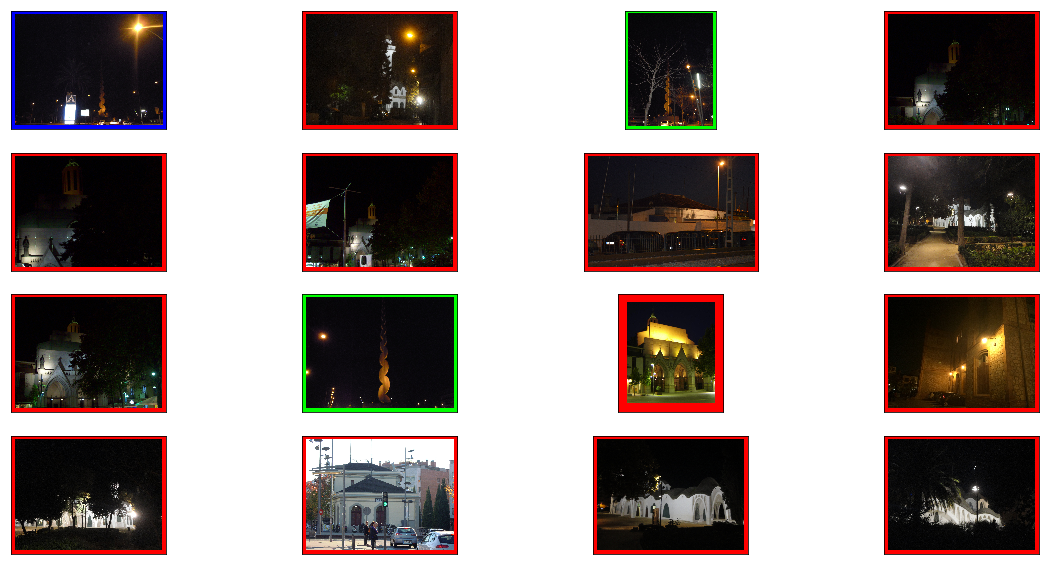

In [18]:
query_id = '3886-4500-23395.jpg'
ERD.single_eval(params, query_id)

De nit el resultat segueix sent dolent, encara que millor respecte al RootSift

catedral
450
Displaying...


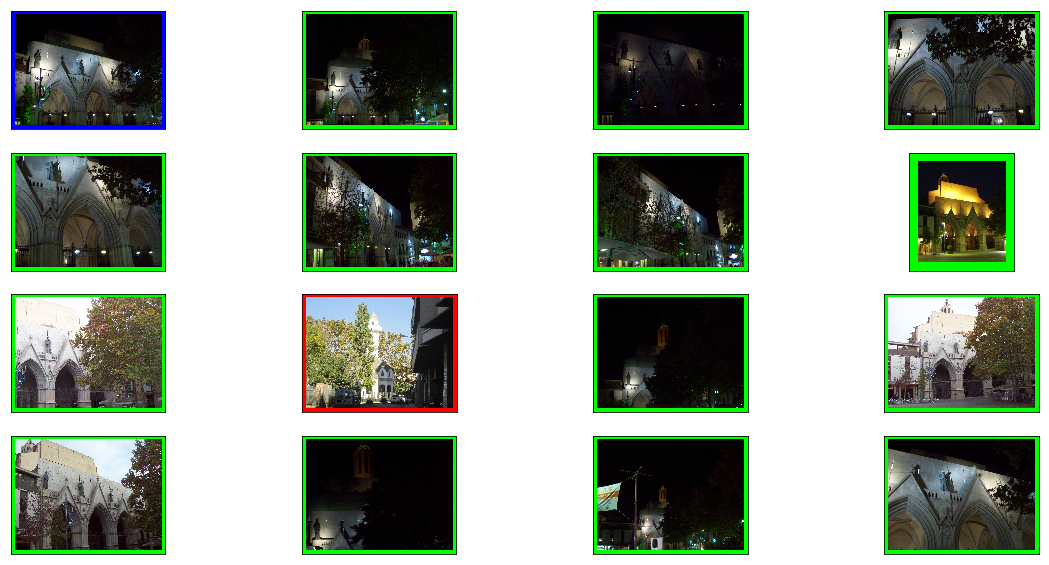

In [19]:
query_id = '26147-18104-14307.JPG'
ERD.single_eval(params, query_id)

Ranking imatge catedral: molt millor que el resultat amb RootSift. Imatge de nit com l'anterior, pero aquesta realitza el ranking quasi perfecte, segurament degut a que encara que sigui de nit l'edifici té iluminació i és força característic. 

societat_general
450
Displaying...


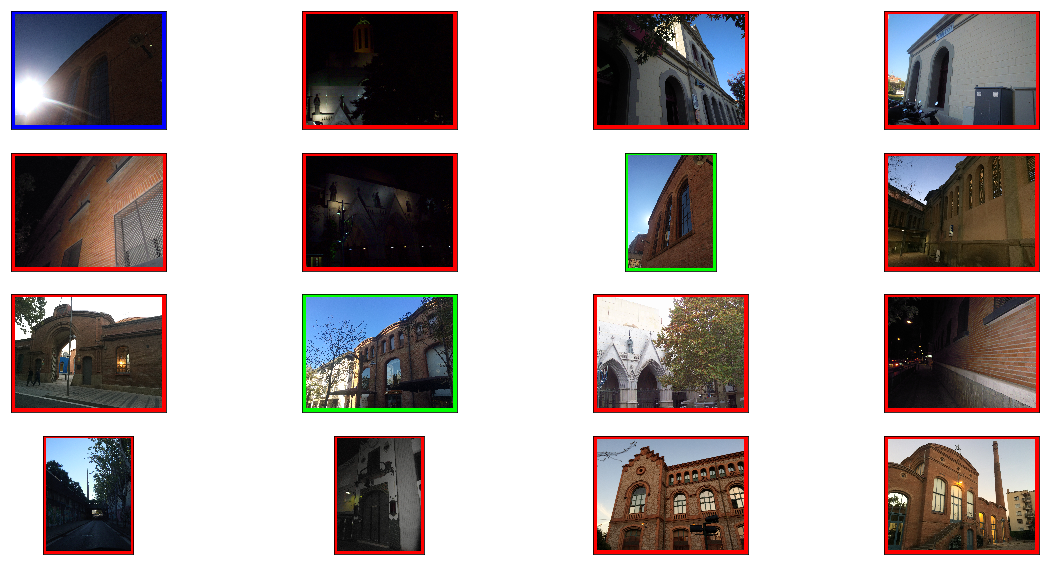

In [20]:
query_id = '25390-11369-432.jpg'
ERD.single_eval(params, query_id)

Imatge amb una forta font de llum (cremada), fa que l'edifici es vegi a l'ombra, com si fos de nit, per això les primeres imatges del ranking ho són.

dona_treballadora
450
Displaying...


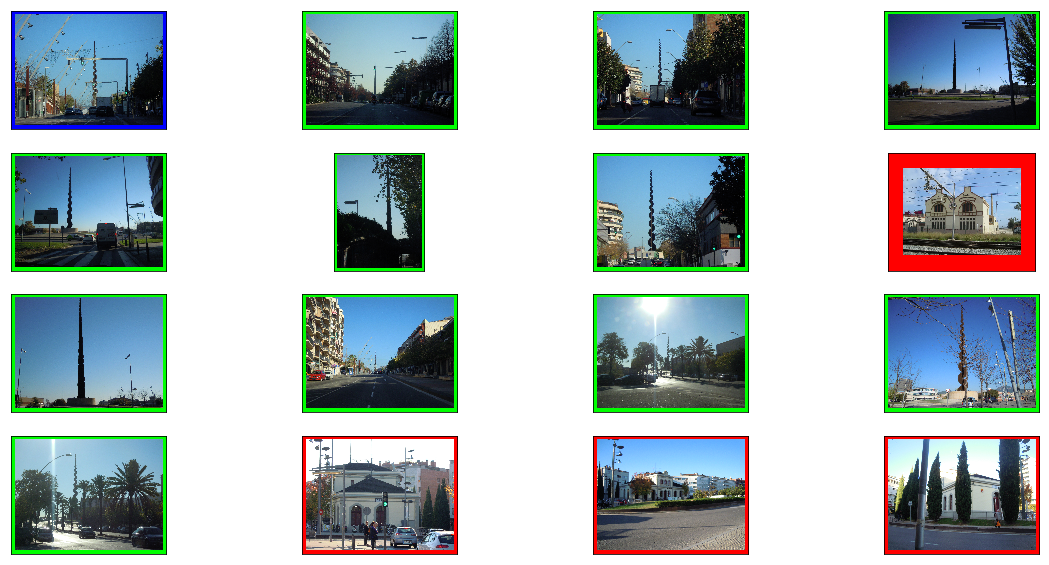

In [21]:
query_id = '4626-21534-28661.JPG'
ERD.single_eval(params, query_id)

In [ ]:
Resultat molt millor al de la sessió passada, que vam obtindre 0 acerts de 15 imatges.

castell_cartoixa
450
Displaying...


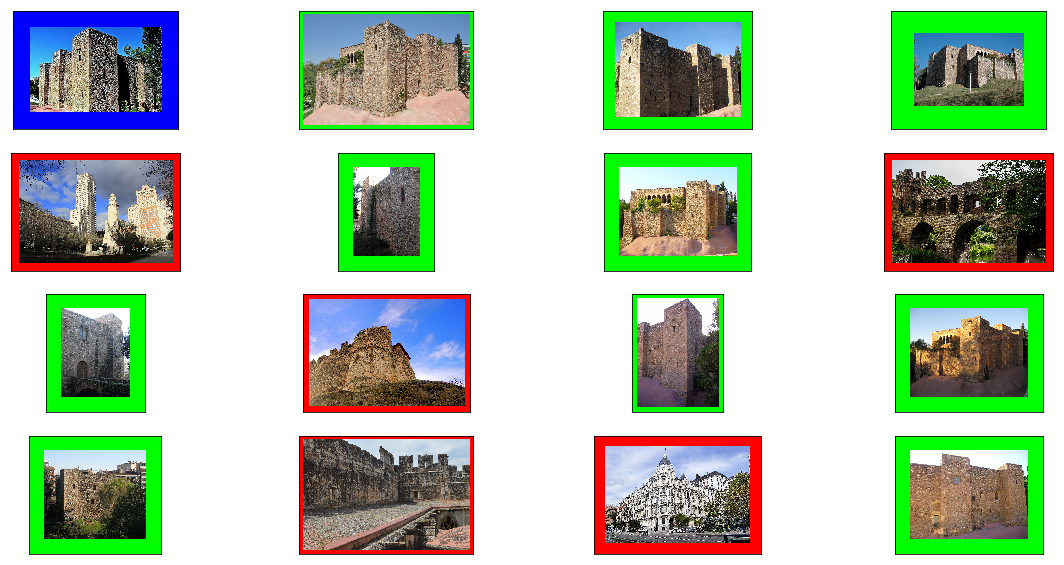

In [22]:
query_id = '14994-8932-16473.jpg'
ERD.single_eval(params, query_id)

Resultat força millor que amb RootSift